<a href="https://colab.research.google.com/github/svondracek0/sda_contest/blob/main/12_Supervised_Learning__Regression_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="180px" src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" align="left" hspace="30px" vspace="50px"/>

# Vítejte v dalším sešitě od SDA!

Během výuky budeme většinou používat [Google Colaboratory](https://colab.research.google.com/?hl=en), což je bezplatné prostředí pro sešity Jupyter, které nevyžaduje žádné nastavení a běží výhradně v cloudu.

Pro rozsáhlejší projekty, zejména ty, které se týkají hlubokého učení a/nebo čtení velkých dat, může být lepší volbou nastavit si Jupyter Notebook nebo Jupyter Lab na svém počítači. Za zmínku také stojí, že existuje velké množství užitečných rozšíření (viz [nbextensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/index.html) a [jupyter-labextension](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)), která nejsou dostupná pro uživatele Colabu.

<img src="https://drive.google.com/uc?export=view&id=1dPgwx8fVt_d9gN-jb-xEQRylfamAI29s" alt="Kde jsme??" title="Kde jsme? Učení pod dohledem: Regrese" align="left" width="1000px" hspace="10px" vspace="10px"/>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# Učení pod dohledem: Regrese
Začněte tím, že si přečtete snímky prezentace.

<br>

Po absolvování kurzu **<font color='#ed7d31'>UČENÍ POD DOHLEDEM: REGRESE</font>** budete znát **scikit learn**, nejběžnější knihovnu používanou datovými vědci pro klasické algoritmy strojového učení, včetně řešení regresních problémů.

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# 1. Úvod do regresních problémů

**<font color='#ed7d31'>PRAKTICKÉ WORKSHOPY SE SDÍLENÍM OBRAZOVKY S VAŠÍM MENTOREM</font>**

<img src="https://drive.google.com/uc?export=view&id=1HvzhT0v9GNDzvFrQf06MoxBK9jHRRRQd" alt="Regresní problémy: úvod" title="Regresní problémy: úvod" align="center" width="600px" hspace="30px" vspace="10px"/>


Stáhněte si [Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download).

In [3]:
# import knihoven

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# v jakem jsme adresari
!pwd

/content


In [8]:
!ls

Housing.csv  sample_data


In [5]:
# vypise vsechny soubory v adresari
!ls

sample_data


In [6]:
# !ls ./drive/MyDrive

ls: cannot access './drive/MyDrive': No such file or directory


In [9]:
path='./Housing.csv'

house_prices=pd.read_csv(path)
house_prices.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test = train_test_split(house_prices, test_size=0.1)

In [ ]:
# data_train.to_csv('train.csv', index=False)
data_test.drop("price", axis=1).to_csv('X_test.csv', index=False)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
house_prices.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Zapamatujte si `scatteplot()` syntaxi a seznam argumentů:

> Přidat blokovou citaci


```python
seaborn.scatterplot(
    data=None, *, x=None, y=None, hue=None, size=None, style=None,
    palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None,
    size_norm=None, markers=True, style_order=None, legend='auto', ax=None,
    **kwargs
)
```

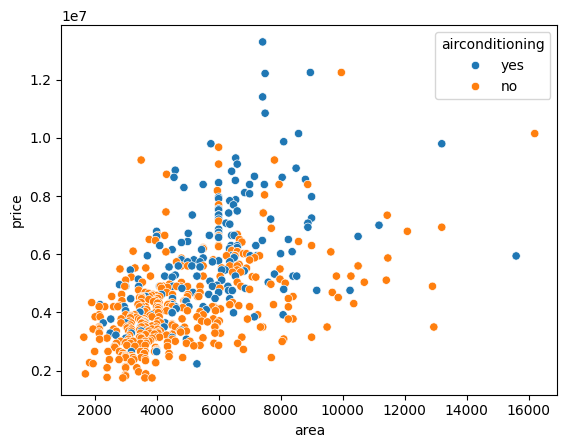

In [ ]:
sns.scatterplot(
    data=house_prices,
    x='area',
    y='price',
    hue='airconditioning'
)

plt.show()

<ipython-input-14-74befd74b3e3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(house_prices['price']))


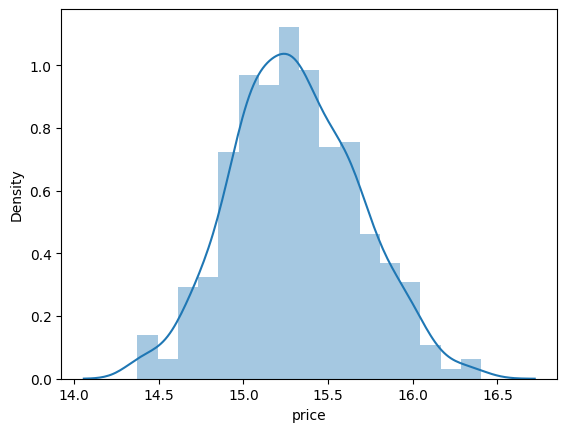

In [ ]:
sns.distplot(np.log(house_prices['price']))
plt.show()

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Lineární regrese v scikit-learn

V knihovně scikit-learn (sklearn) se class **<font color='#ed7d31'>LinearRegression</font>** používá k provádění lineární regrese, což je běžný algoritmus učení s dohledem pro předpovídání spojité cílové proměnné na základě jedné nebo více vstupních funkcí. Lineární regrese předpokládá lineární vztah mezi atributy a cílovou proměnnou.

Viz oficiální [dokumentace](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
X = house_prices[['area']]
y = house_prices['price']
y.shape

(545,)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# importujte LinearRegression z modulu linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# vytvořte instanci třídy LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# import knihovny plotly pro tvoreni grafu
from plotly import express as px

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plot_df = pd.DataFrame({"actual": y_test, "predicted": y_pred})
plot_df

,actual,predicted
42,7700000,5.485217e+06
260,4473000,3.778505e+06
15,9100000,5.238315e+06
374,3640000,3.962653e+06
522,2380000,3.425127e+06
...,...,...
296,4200000,4.518183e+06
112,6083000,4.363869e+06
539,1855000,3.690032e+06
433,3290000,3.942078e+06


In [ ]:
# plot figure of actual vs predicted values, scale them so both start at 0
fig = px.scatter(plot_df, x="actual", y="predicted", trendline="ols")
fig.update_layout(xaxis_range=[plot_df['actual'].min(), 10000000], yaxis_range=[plot_df['actual'].min(), 10000000])
fig.show()

Po vytvoření objektu **<font color='#ed7d31'>LinearRegression</font>** a natrénování modelu pomocí trénovacích dat můžete:
* provádět předpovědi (na stejných nebo zcela nových vzorcích dat).
* přistupovat k parametrům modelu pomocí objektu `Attributes`
    * `.coef_` - koeficienty (váhy) pro každý vstupní atribut
    * `.intercept_` - průsečík (intercept)

Rovnice primky:   
**y = ax + b**  

- y - vysvetlovana promenna
- a - koeficient
- b - intercept

In [ ]:
# pokud dum nebude mit zadnou plochu, bude stat 2387308
model.intercept_

np.float64(2152036.972269953)

In [ ]:
# s kazdou jednotkou plochy (asi square ft?) se zvysi cena prave o 461.9
model.coef_

array([514.37962296])

In [ ]:
from IPython.display import display, Latex

beta0 = round(model.intercept_, 2)
beta1 = round(model.coef_[0], 2)

display(Latex(f'$y_i = \\beta_0 + \\beta_1 \cdot x_1 = {beta0} + {beta1} \cdot x_1 $'))

<IPython.core.display.Latex object>

In [ ]:
# predikujeme cenu domu o plose 2500 sq ft
model.predict([[3200]])  # jedno pozorování

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3798051.76574467])

In [ ]:
model.predict([[2500], [7240]])  # dvě pozorování

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3437986.02967207, 5876145.4425065 ])

In [ ]:
# r squared metric
r2 = model.score(X_test, y_test)
r2

0.21171214252351278

In [ ]:
test_data = X.tail(10)

In [ ]:
model.predict(test_data)

array([3880352.5054184 , 3911215.28279605, 3026482.3313034 ,
       4029008.21645409, 3690032.04492289, 3695175.8411525 ,
       3386548.06737599, 4014091.20738822, 3648881.67508602,
       4132398.52066922])

In [ ]:
X_test = np.linspace(start=1800, stop=16000).reshape(-1, 1)
y_test = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



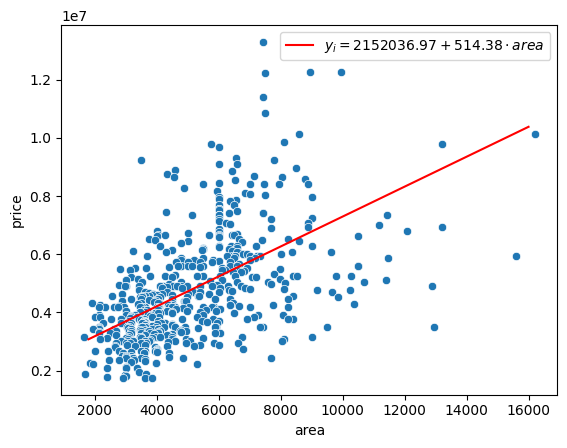

In [ ]:
sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)
plt.plot(
    X_test,
    y_test,
    c='red',
    label=f'$y_i = {beta0} + {beta1} \cdot area $'
)

plt.legend()
plt.show()

In [ ]:
y_train_pred = model.predict(X)

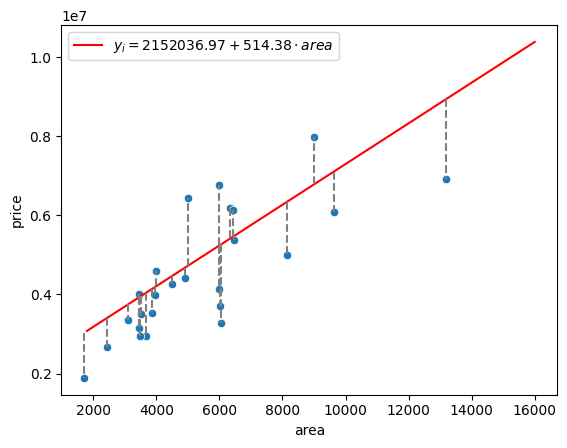

In [ ]:
house_prices_sample = house_prices.sample(25, random_state=0)

sns.scatterplot(
    data=house_prices_sample,
    x='area',
    y='price'
)
plt.plot(
    X_test,
    y_test,
    c='red',
    label=f'$y_i = {beta0} + {beta1} \cdot area $'
)

for i, obs in house_prices_sample.iterrows():
    plt.vlines(
        x=obs['area'],
        ymin=y_train_pred[i],
        ymax=obs['price'],
        color='grey',
        linestyles='dashed'
    )

plt.legend()
plt.show()

### Rozdělení reziduí

In [ ]:
remainders = y - y_train_pred
remainders

,price
0,7.331266e+06
1,5.489122e+06
2,4.974742e+06
3,6.205116e+06
4,5.441266e+06
...,...
540,-1.875176e+06
541,-1.619398e+06
542,-2.264091e+06
543,-1.898882e+06


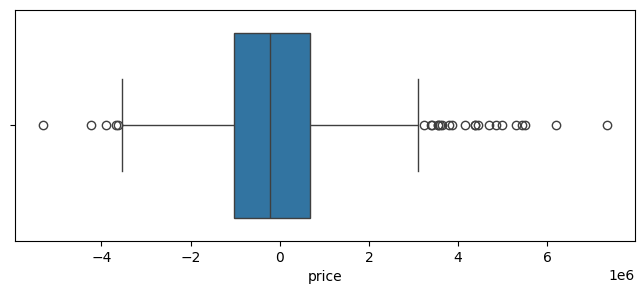

In [ ]:
plt.figure(figsize=(8, 3))

sns.boxplot(x=remainders)
plt.show()

In [ ]:
remainders.abs()

,price
0,7.331266e+06
1,5.489122e+06
2,4.974742e+06
3,6.205116e+06
4,5.441266e+06
...,...
540,1.875176e+06
541,1.619398e+06
542,2.264091e+06
543,1.898882e+06


In [ ]:
remainders ** 2

,price
0,5.374746e+13
1,3.013046e+13
2,2.474806e+13
3,3.850346e+13
4,2.960738e+13
...,...
540,3.516284e+12
541,2.622450e+12
542,5.126109e+12
543,3.605752e+12


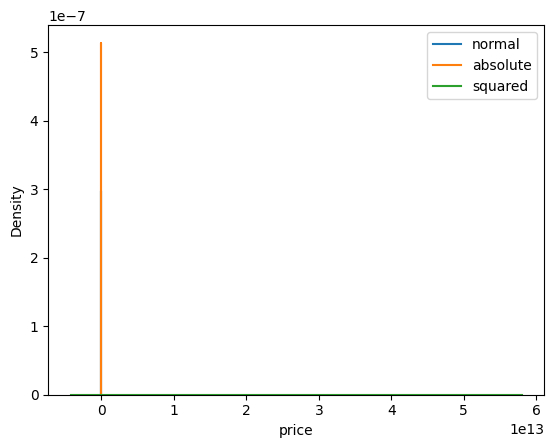

In [ ]:
sns.kdeplot(remainders, label='normal')
sns.kdeplot(remainders.abs(), label='absolute')
sns.kdeplot(remainders ** 2, label='squared')

plt.legend()
plt.show()

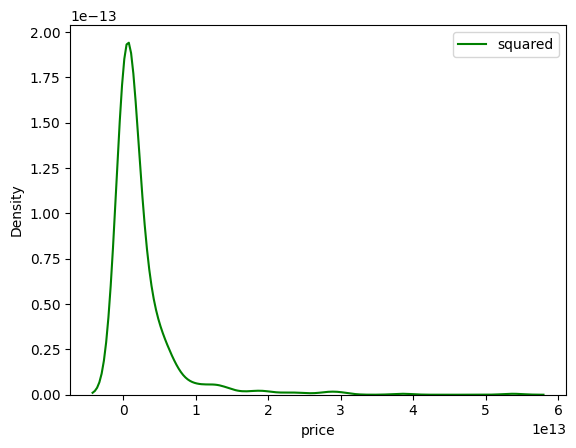

In [ ]:
# sns.kdeplot(remainders, label='normal')
# sns.kdeplot(remainders.abs(), label='absolute')
sns.kdeplot(remainders ** 2, label='squared', c='green')

plt.legend()
plt.show()

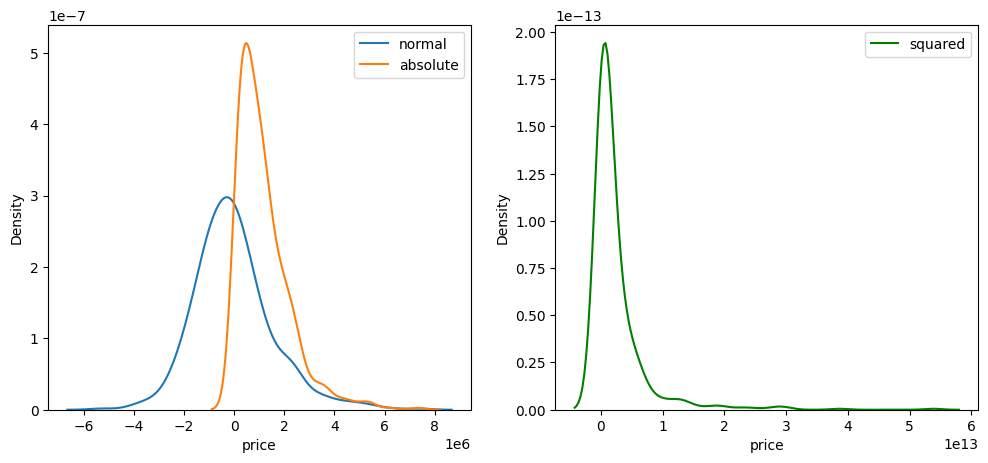

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(remainders, label='normal', ax=ax1)
sns.kdeplot(remainders.abs(), label='absolute', ax=ax1)
ax1.legend()

sns.kdeplot(remainders ** 2, label='squared', c='green', ax=ax2)
ax2.legend()

plt.show()

### Nákladová funkce

Ve strojovém učení je  **<font color='#ed7d31'>nákladová funkce</font>**, které také říkáme **<font color='#ed7d31'>cost function</font>** nebo **<font color='#ed7d31'>loss function</font>**, matematická funkce, která kvantifikuje celkovou chybu mezi předpovídaným výstupem modelu strojového učení a skutečným cílovým výstupem. Umožňuje agregovat chyby dohromady a je nezbytnou součástí při trénování modelu, protože pomáhá měřit, jak dobře model funguje.

Poskytuje také základ pro minimalizaci chyb.

Cílem strojového učení je obvykle **<font color='green'>minimalizace nákladové funkce</font>** úpravou parametrů modelu. Snažíme se, aby se předpovědi modelu co nejvíce blížily skutečným cílovým hodnotám. Volba nákladové funkce závisí na konkrétním řešeném problému a povaze dat. V regresních problémech se nejčastěji používají tyto nákladové funkce:
* střední kvadratická chyba (MSE),
* střední absolutní chyba (MAE),
* koeficient determinace (R2-skóre).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
remainders.sum(), remainders.abs().sum(), np.sum(remainders ** 2)

(np.float64(-18879458.621259004),
 np.float64(640659325.866156),
 np.float64(1364119306222612.5))

In [ ]:
# střední absolutní chyba
mae = remainders.abs().sum() / len(remainders)
mae

np.float64(1175521.6988369834)

In [ ]:
assert mae == mean_absolute_error(y, y_train_pred)

In [ ]:
# střední kvadratická chyba
mse = np.sum(remainders ** 2) / len(remainders)
mse

np.float64(2502971204078.188)

In [ ]:
assert mse == mean_squared_error(y, y_train_pred)

In [ ]:
# odmocněná střední kvadratická chyba
rmse = np.sqrt(mse)
rmse

np.float64(1582078.1283104157)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(y, y_train_pred)

0.2671812802581628

In [ ]:
# spočítejta sami a porovnejte výsledky
# střední absolutní procentní chyba
np.sum(np.abs(remainders / y)) / len(y)

np.float64(0.2671812802581628)

In [ ]:
# vážená střední absolutní procentní chyba
mean_absolute_percentage_error(y, y_train_pred, sample_weight=y)

0.24660970610038363

In [ ]:
remainders.abs().sum() / np.sum(y)

np.float64(0.24660970610038363)

### Metoda nejmenších čtverců

Během procesu trénování se **<font color='green'>parametry modelu iterativně upravují pomocí optimalizačních algoritmů</font>**, jako je metoda nejmenších čtverců založená na gradientním sestupu. Gradient nákladové funkce vzhledem k parametrům modelu udává směr nejstrmějšího sestupu a vede optimalizační algoritmus k minimu.

Sledujme tento proces krok za krokem, abychom lépe pochopili, co se pod ním děje, když pohodlně sedíme před počítačem a trénujeme model pomocí metody `.fit()` implementované ve třídě LinearRegression, kterou poskytuje sklearn.

Definujme funkci, která pro předem určenou množinu pozorování (X i y) vrátí **<font color='blue'>hodnotu nákladové funkce</font>** v závislosti na parametru $\theta_1$, kde $y=\theta_1\cdot X$ (zde X obsahuje jednu funkci).Zkontrolujte tuto hodnotu pro několik parametrů $\theta_1$ a zjistěte, zda najdete nejlepší (tj. optimální) parametr.

In [ ]:
# def cost_function(X, y, theta_1):
#     y_pred = (X.values * theta_1).reshape(1, -1)
#     return np.sum((y.values - y_pred) ** 2) / len(X)

# cost_function(X, y, theta_1=250)
# cost_function(X, y, theta_1=2000)

In [ ]:
def cost_function(theta_1):
    return mean_squared_error(y, X.values * theta_1)

In [ ]:
cost_function(250)

14804181846359.816

In [ ]:
cost_function(500)

7298149247575.413

In [ ]:
THETAS = np.linspace(start=0, stop=2500).reshape(-1, 1)
COSTS = [cost_function(theta) for theta in THETAS]

In [ ]:
np.random.seed(6)

theta_1_initial = np.random.random() * 2000
theta_1_initial

1785.7203028720032

2. Vezměme v úvahu **<font color='blue'>vzorec nákladové funkce</font>**, $$J(\theta_1) = \frac{\sum_{i=1}^n (y_i - \theta_1\cdot X_i)^2}{n}$$ implementujme novou funkci, která vrací hodnotu derivace v daném bodě, tj. $$J'(\theta_1) = \frac{2\cdot \sum_{i=1}^n [(y_i - \theta_1\cdot X_i)\cdot (-X_i)]}{n} = \frac{2\cdot \sum_{i=1}^n (\theta_1\cdot X_i^2 - y_i\cdot X_i)}{n}$$

In [ ]:
def cost_function_theta_1_derivative(X, y, theta_1):
    val1 = theta_1 * (X.values ** 2)
    val2 = np.multiply(y.values.reshape(-1, 1), X.values.reshape(-1, 1))

    numerator = 2 * np.sum(val1 - val2)
    return numerator / len(X)

In [ ]:
cost_function_theta_1_derivative(X, y, theta_1_initial)

np.float64(58086486695.21558)

3. Cílem **<font color='blue'>optimalizace nákladové funkce</font>** je najít takový soubor parametrů modelu (koeficientů, zde $\theta_1$), který minimalizuje nákladovou funkci, a tím dosáhne co nejlepší shody s daty. Proces optimalizace zahrnuje iterační úpravu koeficientů s cílem minimalizovat nákladovou funkci.

In [ ]:
def get_next_optimization_step(theta_1_initial):
    # hodnoty nákladové funkce
    plt.plot(
        THETAS,
        COSTS,
        label='$y = J(\\theta_1) $'
    )

    # hodnota nákladové funkce pro aktuální krok (tj. parametr theta).
    plt.plot(
        theta_1_initial,
        cost_function(theta_1_initial),
        c='darkorange',
        marker='o',
        label='initial point'
    )

    # parametry tečny a graf
    slope = cost_function_theta_1_derivative(X, y, theta_1_initial)
    beta = cost_function(theta_1_initial) - slope * theta_1_initial  # průsečík s vertikální osou

    tangent_line_range = np.linspace(
        start=max(0, theta_1_initial-500),
        stop=min(theta_1_initial+500, 2500),
    ).reshape(-1, 1)

    plt.plot(
        tangent_line_range,
        slope * tangent_line_range + beta,
        c='red',
        label='tangent line'
    )

    plt.title(f'Current value of $\\theta _1 = {round(theta_1_initial)}$')
    plt.legend()
    plt.show()

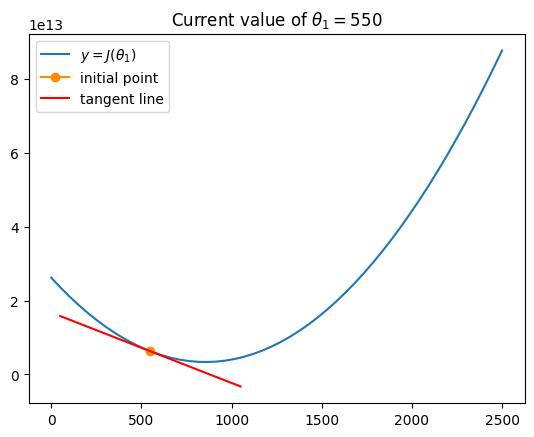

In [ ]:
get_next_optimization_step(550)

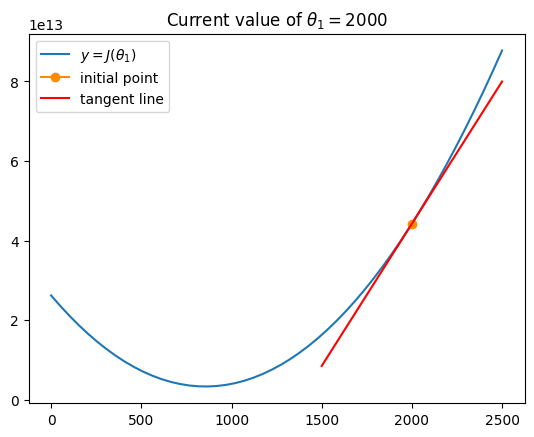

In [ ]:
get_next_optimization_step(2000)

4. **<font color='blue'>Gradient descent</font>** je iterační optimalizační algoritmus, který začíná s počáteční sadou koeficientů a aktualizuje je v opačném směru, než je gradient nákladové funkce. V tomto procesu pokračuje, dokud nedosáhne minimálního bodu, kde se gradient blíží nule. Rychlost učení (learning rate) určuje velikost kroku v každé iteraci.

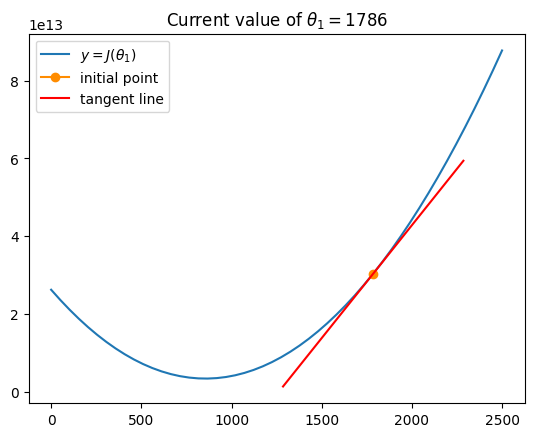

In [ ]:
np.random.seed(6)

theta_1_initial = np.random.random() * 2000
theta_1_initial

get_next_optimization_step(theta_1_initial)

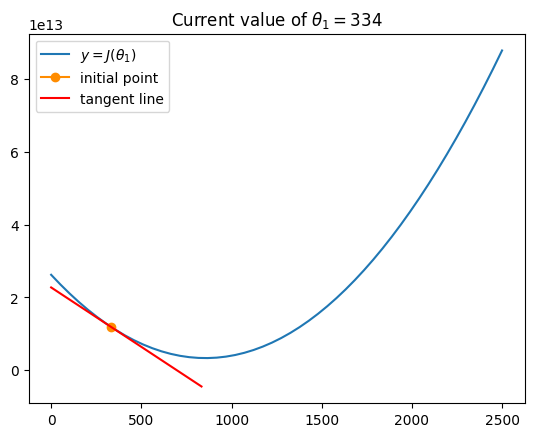

In [ ]:
alpha = 0.000000025
theta_1_initial = theta_1_initial - alpha * cost_function_theta_1_derivative(X, y, theta_1_initial)

get_next_optimization_step(theta_1_initial)

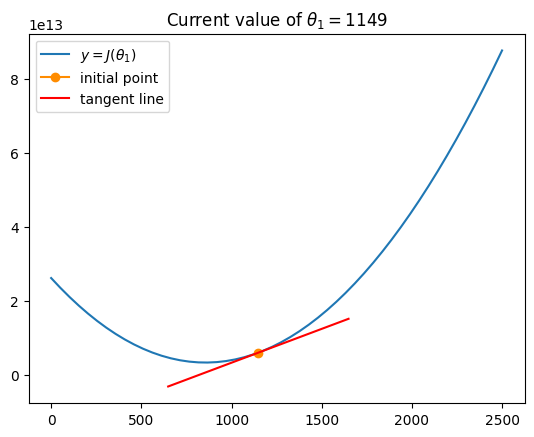

In [ ]:
theta_1_initial = theta_1_initial - alpha * cost_function_theta_1_derivative(X, y, theta_1_initial)

get_next_optimization_step(theta_1_initial)

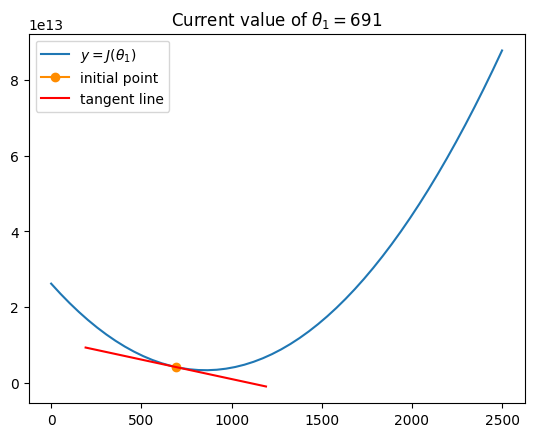

In [ ]:
theta_1_initial = theta_1_initial - alpha * cost_function_theta_1_derivative(X, y, theta_1_initial)

get_next_optimization_step(theta_1_initial)

In [ ]:
theta_1_initial = np.random.random() * 2000

theta_1_initial_list = []
cost_function_values = []

for i in range(100):
    theta_1_initial_list.append(theta_1_initial)
    cost_function_values.append(cost_function(theta_1_initial))

    theta_1_initial = theta_1_initial - alpha * cost_function_theta_1_derivative(X, y, theta_1_initial)

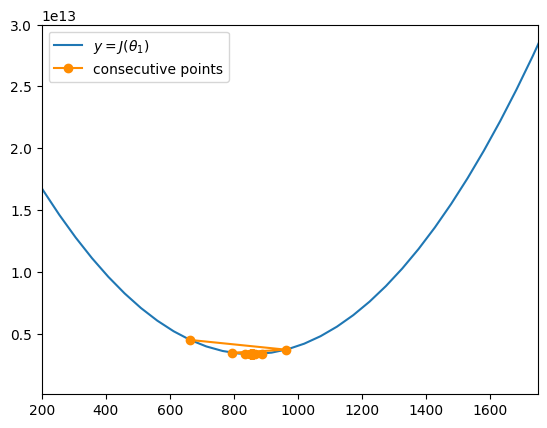

In [ ]:
# plt.figure(figsize=())

plt.plot(
    THETAS,
    COSTS,
    label='$y = J(\\theta_1) $'
)

plt.plot(
    theta_1_initial_list,
    cost_function_values,
    c='darkorange',
    marker='o',
    label='consecutive points'
)

plt.xlim([200, 1750])
plt.ylim([1e11, 3e13])

plt.legend()
plt.show()

In [ ]:
# plt.figure(figsize=())

plt.plot(
    THETAS,
    COSTS,
    label='$y = J(\\theta_1) $'
)

plt.plot(
    theta_1_initial_list,
    cost_function_values,
    c='darkorange',
    marker='o',
    label='consecutive points'
)

plt.xlim([800, 900])
plt.ylim([3e12, 5e12])

plt.legend()
plt.show()

In [ ]:
# best parameter (here line slope)
theta_1_initial_list[-1]

In [ ]:
# best score
cost_function_values[-1]

5. Zkontrolujte výsledky získané naším algoritmem.

In [ ]:
chosen_theta = theta_1_initial_list[-1]

sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)

plt.plot(
    X_test,
    X_test * chosen_theta,
    c='red',
    label=f'$y_i = {round(chosen_theta, 2)} \cdot area $'
)

plt.legend()
plt.show()

### **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>PRO VÁS</font>**

Pomocí implementace scikit-learn vytvořte jednoduchý lineární regresní model, ve kterém je zkreslení nulové (tj. nezahrnujte Y-intercept jako další parametr modelu, který se má naučit).

Výsledek porovnejte s výsledkem získaným výše.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
model.coef_

In [ ]:
model.intercept_

In [ ]:
sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)

plt.plot(
    X,
    X * model.coef_,
    c='red',
    label=f'$y_i = {round(model.coef_[0], 2)} \cdot area $'
)

plt.legend()
plt.show()

In [ ]:
#   Řešení lineární regrese pomocí sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

In [ ]:
#   Řešení lineární regrese pomocí vzorečku
jednicky = np.ones((len(X), 1))
X_star = np.hstack((jednicky, X))
y = y.reshape(-1, 1)
XT_X = np.matmul(X_star.T, X_star)
XT_X_inv = np.linalg.inv(XT_X)
XT_X_inv_XT = np.matmul(XT_X_inv, X_star.T)
XT_X_inv_XT_y = np.matmul(XT_X_inv_XT, y)
omega = XT_X_inv_XT_y
omega

In [ ]:
y.shape

### **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>PRO VÁS</font>**

Vytvořte dva grafy, na kterých můžete sledovat:
* změnu hodnoty nákladové funkce
* jak se mění parametr theta.

Poté zvažte, zda byl navržený počet iterací, tj. 100, dostatečný. Pokud ano, možná mohlo být naše ruční školení dokončeno dříve. Jak poznat, kdy přestat, a jak to provést?

In [ ]:
import matplotlib.pyplot as plt

diference = pd.Series(theta_1_initial_list).diff()
plt.plot(diference)
plt.show()
#cost_function_values

In [ ]:
import matplotlib.pyplot as plt

diference = pd.Series(cost_function_values).diff()
plt.plot(diference)
plt.show()
#cost_function_values

In [ ]:
theta_1_initial_list

### **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>PRO VÁS</font>**

Experimentujte s různými hodnotami rychlosti učení (learning rate) tak, abyste v následujících iteracích získali:
* mírně horší výsledky (příliš vysoká hodnota $\alpha$ ),
* velmi blízké výsledky pro hodnotu ztráty ($\theta_1$ by se měla výrazně změnit),
* nebo zůstat na jedné straně od extrému po celou dobu korekce hodnoty ztráty (optimální/malá $\alpha$).

<img src="https://drive.google.com/uc?export=view&id=1VZGk9YwTTxSG6-Zj-Qrf2fzlnMiZS-Ug" alt="Rychlost učení (learning rate): experimenty" title="Rychlost učení (learning rate): experimenty" align="center" width="1000px" hspace="30px" vspace="10px"/>

In [ ]:
alpha = 0.0000000000025
theta_1_initial = np.random.random() * 2000

theta_1_initial_list = []
cost_function_values = []

for i in range(100):
    theta_1_initial_list.append(theta_1_initial)
    cost_function_values.append(cost_function(theta_1_initial))

    theta_1_initial = theta_1_initial - alpha * cost_function_theta_1_derivative(X, y, theta_1_initial)

In [ ]:
theta_1_initial_list

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Polynomiální regrese

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
poly.get_feature_names_out()

In [ ]:
pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

Alternativně se ve třídě `PolynomialFeatures`  z knohovny scikit-learn používá parametr `set_output`, který řídí formátování výstupního pole při generování polynomických funkcí ze vstupních dat. PolynomialFeatures je třída pro předzpracování dat, která umožňuje generovat polynomické a interakční atributy na základě  vstupních proměnných, více viz:

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html#sphx-glr-auto-examples-miscellaneous-plot-set-output-py

In [ ]:
from sklearn import config_context

In [ ]:
with config_context(transform_output="pandas"):
    # výstupem transformace bude Pandas DataFrame
    X_poly = poly.fit_transform(X)

X_poly.head()

### Bez průsečíku osy Y

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

In [ ]:
X_test = np.linspace(start=1800, stop=16000).reshape(-1, 1)
with config_context(transform_output="pandas"):
    X_test = poly.transform(X_test)

y_test = model.predict(X_test)

In [ ]:
model.coef_

In [ ]:
beta1, beta2 = model.coef_

sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)

plt.plot(
    X_test['area'],
    y_test,
    c='red',
    label=f'$y_i = {round(beta1)} \cdot area + ({round(beta2, 3)}) \cdot area ^2 $'
)

plt.legend()
plt.show()

In [ ]:
# R2-score
model.score(X_poly, y)

In [ ]:
# model s polynomiálními funkcemi vs. lineární model
mean_squared_error(y, model.predict(X_poly)), mse

In [ ]:
mean_squared_error(y, model.predict(X_poly)) / mse

### S průsečíkem osy Y

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)

In [ ]:
# X_test = np.linspace(start=1800, stop=16000).reshape(-1, 1)
# with config_context(transform_output="pandas"):
    # X_test = poly.transform(X_test)

y_test = model.predict(X_test)

In [ ]:
beta1, beta2 = model.coef_

sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)

plt.plot(
    X_test['area'],
    y_test,
    c='red',
    label=f'$y_i = {round(model.intercept_)} + {round(beta1)} \cdot area + ({round(beta2, 3)}) \cdot area ^2 $'
)

plt.legend()
plt.show()

In [ ]:
mean_squared_error(y, model.predict(X_poly)) / mse

Porovnejme také koeficienty determinace:

In [ ]:
# exp. I
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print('Linear model, no Y-intercept', model.score(X, y))

# exp. II
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print('Linear model, with Y-intercept', model.score(X, y))

# exp. III
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

print('Polynomial features, no Y-intercept', model.score(X_poly, y))

# exp. IV
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)

print('Polynomial features, with Y-intercept', model.score(X_poly, y))

[text odkazu](https://)### **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>PRO VÁS</font>**

Vyzkoušejte také jednorozměrnou regresi s vyššími mocninami, konkrétně 3, 4 a 5.

In [ ]:
poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)
model.coef_

In [ ]:
X_test = np.linspace(start=1800, stop=16000).reshape(-1, 1)
poly = PolynomialFeatures(3, include_bias=False)
X_test = poly.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=["area", "area^2", "area^3"])
y_test = model.predict(X_test)
beta1, beta2, beta3 = model.coef_

sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)

plt.plot(
    X_test['area'],
    y_test,
    c='red',
    label=f'$y_i = {round(model.intercept_)} + {round(beta1)} \cdot area + ({round(beta2, 3)}  \cdot area ^2 $ + ({round(beta3, 3)}) \cdot area ^3 $'
)

plt.legend()
plt.show()

In [ ]:
X_test

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Lineární regrese s více proměnnými

In [ ]:
path='/content/Housing.csv'

house_prices=pd.read_csv(path, usecols=['price', 'area', 'airconditioning'])
house_prices.head()

In [ ]:
sns.scatterplot(
    data=house_prices,
    x='area',
    y='price',
    hue='airconditioning'
)

plt.show()

In [ ]:
X = house_prices[['area', 'airconditioning']]
X['airconditioning'] = X['airconditioning'].map({'yes': 1, 'no': 0})
X.head()

In [ ]:
poly = PolynomialFeatures(2, include_bias=False)

with config_context(transform_output="pandas"):
    # výstupem transformace bude Pandas DataFrame
    X_poly = poly.fit_transform(X)
# vyfiltrovat jen proměnné které checeme (např. airconditioning^2 nedává smysl, protože je totožná s airconditioning)
X_poly = X_poly[['area', 'airconditioning', 'area^2', 'area airconditioning']]
X_poly.head()

In [ ]:
# exp. I
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print('Linear model, no Y-intercept', model.score(X, y))

# exp. II
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print('Linear model, with Y-intercept', model.score(X, y))

# exp. III
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

print('Polynomial features, no Y-intercept', model.score(X_poly, y))

# exp. IV
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)

print('Polynomial features, with Y-intercept', model.score(X_poly, y))

In [ ]:
# s klimatizací (air conditioning)
X_test_1 = pd.DataFrame(
    np.linspace(start=1800, stop=16000).reshape(-1, 1),
    columns=['area']
)
X_test_1['airconditioning'] = 1

with config_context(transform_output="pandas"):
    X_test_1 = poly.transform(X_test_1)
    X_test_1 = X_test_1[['area', 'airconditioning', 'area^2', 'area airconditioning']]

y_test_1 = model.predict(X_test_1)

# bez klimatizace (air conditioning)
X_test_0 = pd.DataFrame(
    np.linspace(start=1800, stop=16000).reshape(-1, 1),
    columns=['area']
)
X_test_0['airconditioning'] = 0

with config_context(transform_output="pandas"):
    X_test_0 = poly.transform(X_test_0)
    X_test_0 = X_test_0[['area', 'airconditioning', 'area^2', 'area airconditioning']]

y_test_0 = model.predict(X_test_0)

sns.scatterplot(
    data=house_prices,
    x='area',
    y='price',
    hue='airconditioning'
)

plt.plot(
    X_test_1['area'],
    y_test,
    c='green',
    label='both'
)

plt.plot(
    X_test_1['area'],
    y_test_1,
    c='blue',
    label='yes'
)

plt.plot(
    X_test_0['area'],
    y_test_0,
    c='red',
    label='no'
)

plt.legend()
plt.show()

In [ ]:
poly = PolynomialFeatures(3)

with config_context(transform_output="pandas"):
    # výstupem transformace bude Pandas DataFrame
    X_poly = poly.fit_transform(X)
# vyfiltrovat jen proměnné které checeme (např. airconditioning^2 nedává smysl, protože je totožná s airconditioning)
X_poly = X_poly[['area', 'airconditioning', 'area^2', 'area^3', 'area airconditioning']]
X_poly.head()

In [ ]:
# exp. I
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print('Linear model, no Y-intercept', model.score(X, y))

# exp. II
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print('Linear model, with Y-intercept', model.score(X, y))

# exp. III
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

print('Polynomial features, no Y-intercept', model.score(X_poly, y))

# exp. IV
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)

print('Polynomial features, with Y-intercept', model.score(X_poly, y))

### **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>PRO VÁS</font>**

Znovu načtěte datovou sadu, tentokrát stáhněte všechny dostupné prvky. Hrajte si s různými modely a zjistěte, který z nich poskytuje nejlepší výsledky.

Zjistěte, jaký vliv na výkonnost modelu má dodatečné škálování proměnných.

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_scaled, y)
model.coef_
model.score( X_scaled, y)

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Rozhodovací stromy

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
X, y = house_prices.drop("price", axis=1), house_prices["price"]

In [20]:
X=pd.get_dummies(X)

In [13]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X[['area']], y)

DecisionTreeRegressor(random_state=0)

In [14]:
model.score(X[['area']], y)

0.7505845057863226

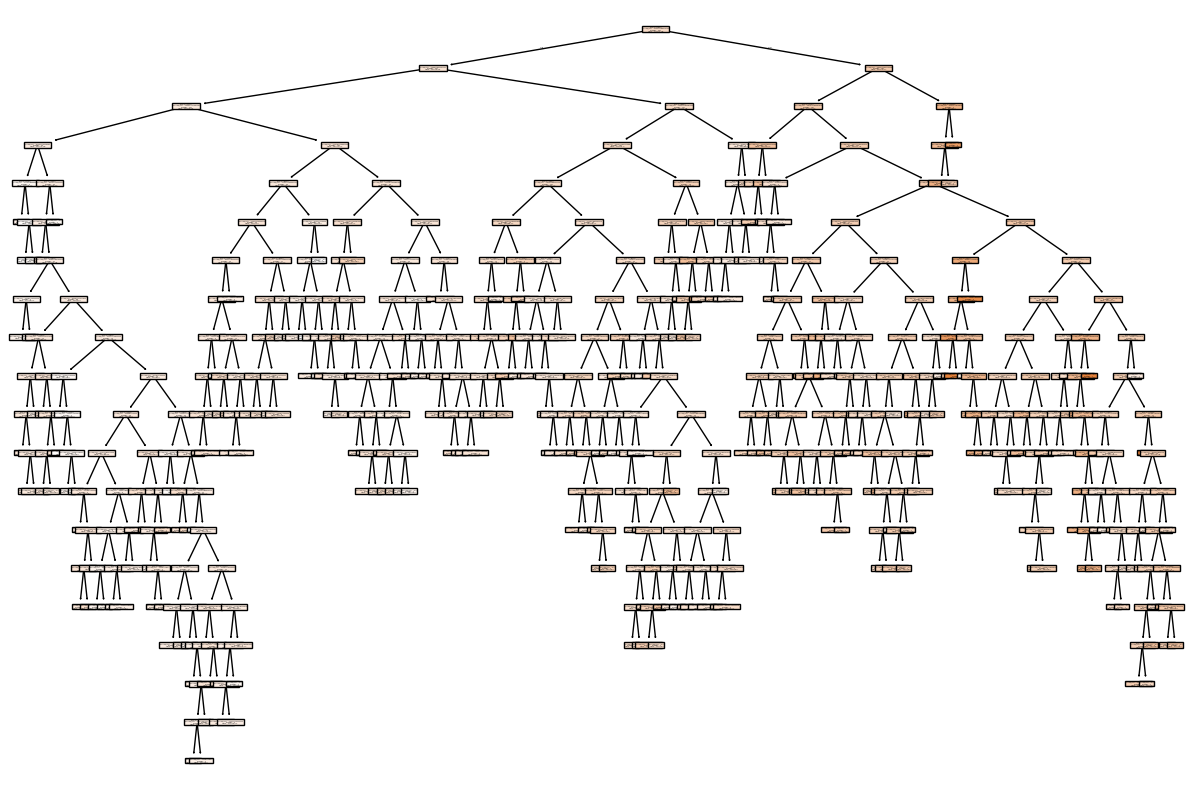

In [16]:
# plot the decision tree
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=['area'], filled=True)
plt.show()

In [ ]:
model

In [21]:
X_test = np.linspace(start=1800, stop=16000).reshape(-1, 1)
y_test = model.predict(X_test)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_tree.fit(X_train, y_train)


y_pred = reg_tree.predict(X_test)

#
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MSE: 2614577091234.6226
R2: 0.48273009102650755


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


<ipython-input-24-2e41f71c701d>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


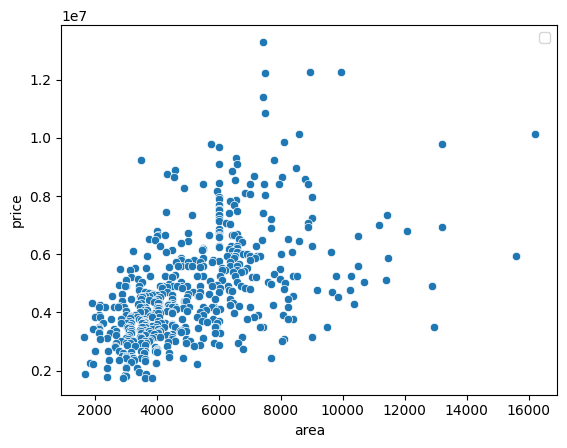

In [24]:
sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)


plt.legend()
plt.show()

### Generalizace modelu (rozdělení na train/test & CV)

*   [Položka seznamu](https://)
*   Položka seznamu



In [25]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    pd.get_dummies(X), y, test_size=0.2, random_state=42
)

In [45]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train[['area']], y_train)

DecisionTreeRegressor(random_state=0)

In [46]:
model.score(X_train[['area']], y_train)

0.7670374554586846

In [47]:
model.score(X_test[['area']], y_test)

0.27182241722105016

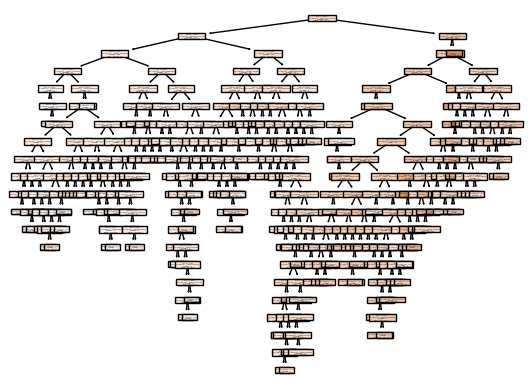

In [48]:
plot_tree(model, feature_names=['area'], filled=True)
plt.show()

In [34]:
# use grid search to find optimal parameters
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=0)
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train[['area']], y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10]})

In [49]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [51]:
model_full = DecisionTreeRegressor(random_state=0, **grid_search.best_params_)
model_full.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                      random_state=0)

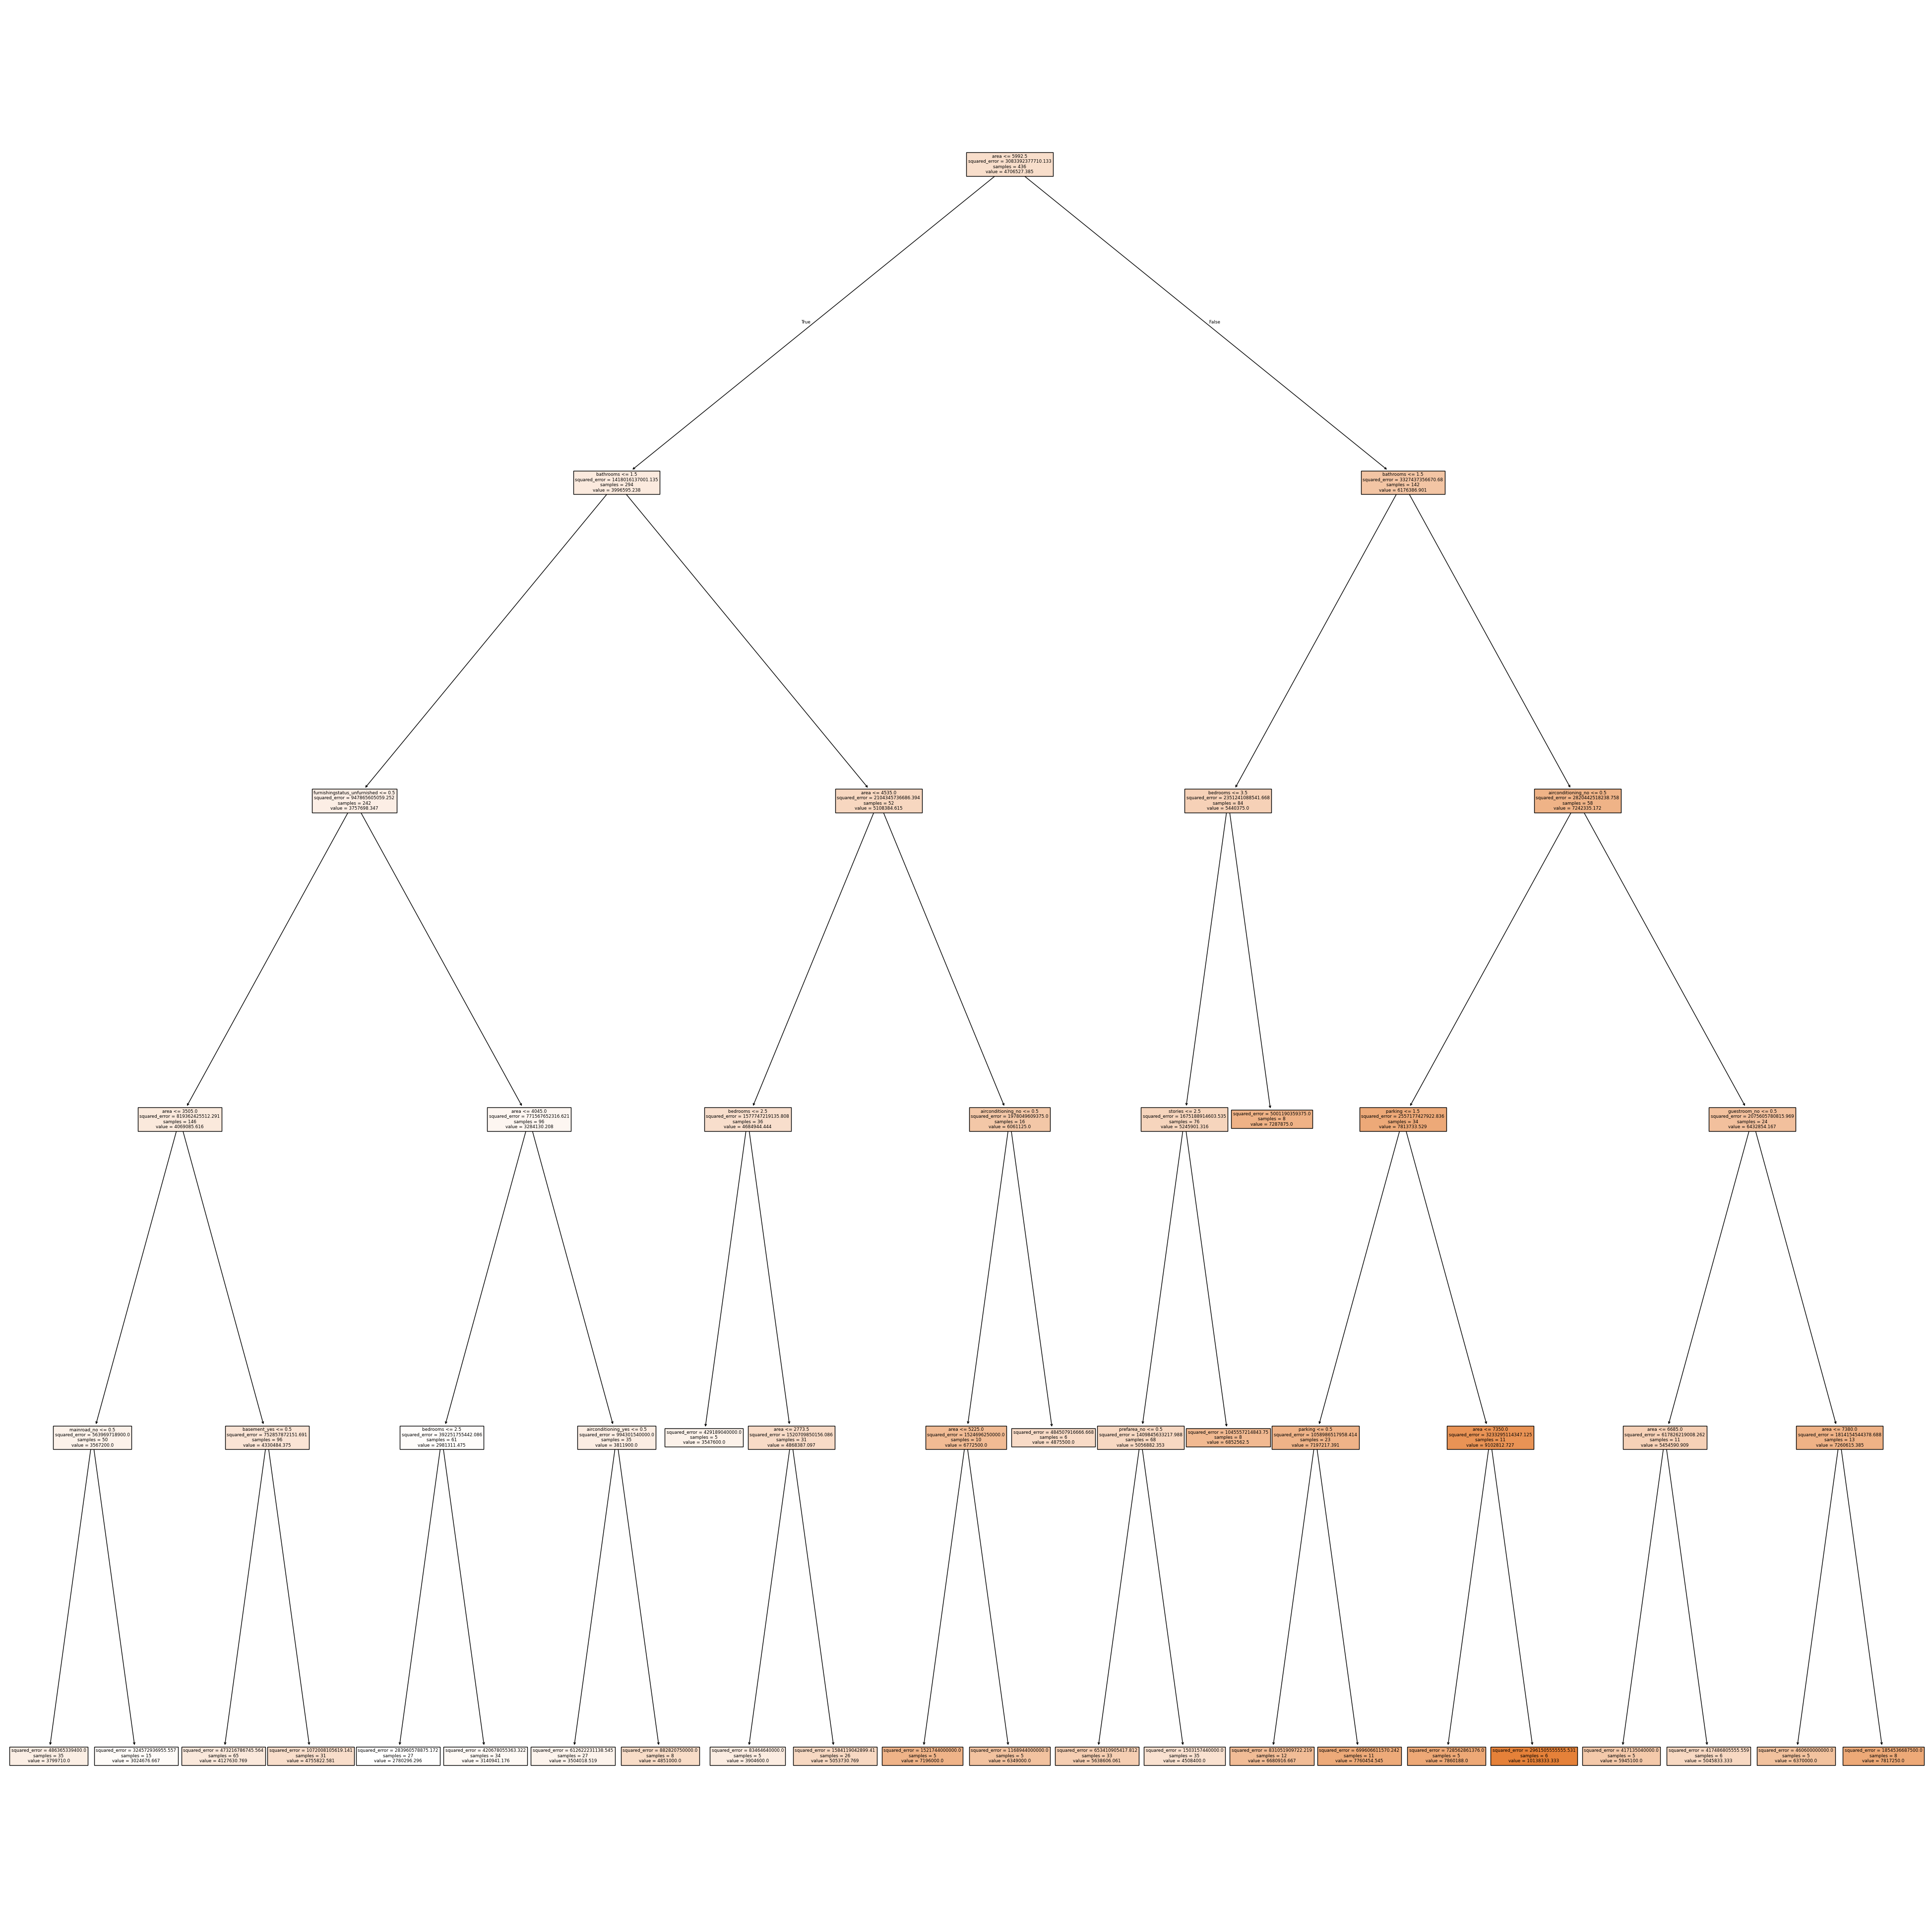

In [54]:
fig = plt.figure(figsize=(50, 50))
plot_tree(model_full, feature_names=X_train.columns, filled=True)
plt.show()

In [35]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [36]:
grid_search.score(X_test[['area']], y_test)

0.3027766655809536

In [37]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10],
    'max_features': ["sqrt"]
}

grid_search_all_features = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10]})

In [40]:
X_train

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
46,6000,3,2,4,1,False,True,True,False,True,False,True,False,False,True,True,False,True,False,False
93,7200,3,2,1,3,False,True,True,False,False,True,True,False,False,True,True,False,False,True,False
335,3816,2,1,1,2,False,True,True,False,False,True,True,False,False,True,True,False,True,False,False
412,2610,3,1,2,0,False,True,True,False,False,True,True,False,True,False,False,True,False,False,True
471,3750,3,1,2,0,False,True,True,False,True,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,False,True,True,False,True,False,True,False,False,True,True,False,False,False,True
106,5450,4,2,1,0,False,True,True,False,False,True,True,False,False,True,False,True,False,True,False
270,4500,3,2,3,1,False,True,True,False,True,False,False,True,True,False,True,False,True,False,False
435,4040,2,1,1,0,False,True,True,False,True,False,True,False,True,False,True,False,False,False,True


In [41]:
grid_search.score(X_test, y_test)

0.48708436562995516

In [42]:
grid_search.score(X_train, y_train)

0.721113190436016

### **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>PRO VÁS</font>**

Trénujte regresor rozhodovacího stromu pomocí všech dostupných sloupců. Ujistěte se, že výsledný model dobře zobecňuje, a najděte nejlepší hyperparametry.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
max_depth_list = [3,  5, 7,  10]
r2_list = []
best_r2 = 0
best_max_depth = 0

for max_depth in max_depth_list:
  model = DecisionTreeRegressor(random_state=0, max_depth=max_depth)
  fit = model.fit(X_train, y_train)
  y_pred = fit.predict(X_train)
  print("trénovací R2: " + str(model.score(X_train,y_train)))
  y_pred = fit.predict(X_test)
  print("testovací R2: " + str(model.score(X_test,y_test)))
  if model.score(X_test,y_test) > best_r2:
    best_r2 = model.score(X_test,y_test)
    best_max_depth = max_depth
  r2_list.append(model.score(X_test,y_test))



In [ ]:
# kód pro hledání kombinace max_depth a min_samples split parametru

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
model = DecisionTreeRegressor(random_state=0)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_r2 = grid_search.best_score_

# Evaluate on the test set
test_r2 = grid_search.score(X_test, y_test)

print(f"Best parameters: {best_params}")
print(f"Best cross-validated R2: {best_r2}")
print(f"Test R2: {test_r2}")

In [ ]:
print("nejlepší R2: " + str(best_r2))
print("nejlepší max_depth: " + str(best_max_depth))

In [ ]:
r2_list

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Appendix: Regularizace, např. Regrese Lasso & Ridge

Regrese Lasso a Ridge jsou dvě běžně používané regularizační techniky ve strojovém učení, zejména v lineárních regresních modelech. Pomáhají zabránit nadměrnému přizpůsobení a zlepšit generalizační výkon modelu přidáním trestného členu do nákladové funkce.

Ve scikit-learn (sklearn), populární knihovně pro strojové učení v jazyce Python, můžete k použití těchto regularizačních technik použít třídy Lasso a Ridge.

* Regrese Lasso:

    Lasso regrese (známá také jako L1 regularizace) přidává k nákladové funkci součet absolutních hodnot koeficientů jako penalizační člen. To model podněcuje k tomu, aby některé koeficienty zmenšil přesně na nulu, čímž efektivně provádí selekci příznaků. V nástroji sklearn můžete k použití Lasso regrese použít třídu Lasso.
    ```python
    from sklearn.linear_model import Lasso

    lasso = Lasso(alpha=0.5)
    lasso.fit(X, y)

    y_pred = lasso.predict(X)
    ```
* Regrese Ridge:
    Regrese Ridge (známá také jako regularizace L2) přidává ke ztrátové funkci součet čtvercových hodnot koeficientů jako sankční člen. To podporuje model, aby snižoval velikosti všech koeficientů, aniž by je nutil k vynulování. Hřebenová regrese může být užitečná, pokud máte k dispozici sadu dat s vysokou dimenzí a mnoha korelovanými rysy. V nástroji sklearn můžete použít třídu Ridge.
    ```python
    from sklearn.linear_model import Ridge

    ridge = Ridge(alpha=0.5)
    ridge.fit(X, y)
    
    y_pred = ridge.predict(X_test)
    ```


<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>
<br>

# ÚKOLY

## **<font color='#306998'>Projekt </font><font color='#ffd33b'>1</font>**

Soubor [fires_thefts.csv](https://drive.google.com/file/d/1T43IyJhBsLoUfKfLMh7X4678DKph4gyA/view?usp=sharing) obsahuje aktuální údaje shromážděné _Komisí USA pro občanská práva_, které ukazují.
* počet požárů v dané čtvrti na tisíc domácností (první sloupec)
* počet vloupání v téže čtvrti na tisíc obyvatel (druhý sloupec).

Vytvořte model, který na základě počtu požárů předpovídá počet vloupání.

## **<font color='#306998'>Otázka </font><font color='#ffd33b'>1.1</font>**

Jak budou vypadat další kroky jednoduché gradientové metody, když se ukáže, že v prvním kroku byly koeficienty $\theta=[\theta_0, \theta_1, ..., \theta_n]$ náhodně inicializovány hodnotami označujícími lokální minimum?

## **<font color='#306998'>Úkol </font><font color='#ffd33b'>1.2</font>**

Načtěte data ze souboru, vytvořte proměnné X a y a přiřaďte jim příslušné hodnoty.

In [ ]:
df = pd.read_csv('fires_thefts.csv')
#print(df.head(10))
y = df['thefts']
X = df['fires']


## **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>1.3</font>**

Doplňte kód implementace nákladové funkce J popisující metodu nejmenších čtverců.

Pamatujte si, že:
$$\begin{array}{rll} J(\theta) &=& \dfrac{1}{m} \displaystyle\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})  - y^{(i)}\right)^2
\end{array} $$

kde $m$ je počet pozorování v souboru dat.

In [ ]:
def J(h, theta, X, y):
    # h - lineární funkce
    # theta = [theta_0, theta_1]
    # X & y - vstupní data (atributy & cílová proměnná)
    h_theta = h(theta, X)
    return np.sum((h_theta - y) ** 2) / len(X)


## **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>1.4</font>**

Pomocí níže uvedených kusů kódu (bez jejich změny) vyberte ručně parametry theta tak, aby hodnota nákladové funkce byla co nejmenší.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np
from numpy import min, max

from IPython.display import Math, clear_output

In [ ]:
X = house_prices[['area']]
y = house_prices['price']

In [ ]:
def linear_function(theta, x):
    return theta[0] + theta[1] * x

def plot_function(theta, X, color):
    X_new = [min(X) - 1, max(X) + 1]
    y_new = [linear_function(theta, x) for x in X_new]
    plt.plot(X_new, y_new, linewidth=2, color=color)

def plot_points(X, y):
    plt.figure(figsize=(20, 10))
    plt.scatter(X, y, s=200)
    plt.xlabel("Number of fires")
    plt.ylabel("Number of burglaries")

In [ ]:
slider_theta_0 = widgets.FloatSlider(
    min=-20, max=20, step=0.1, value=0,
    description=r'theta0',
    layout={'width': "auto"}
)

slider_theta_1 = widgets.FloatSlider(
    min=-20, max=20, step=0.1, value=0,
    description=r'theta1',
    layout={'width': "auto"}
)

out = widgets.Output()
button = widgets.Button(width=100, description="Show")

def btn_event_handler(event):
    with out:
        clear_output(wait=True)
        plot_points(X, y)
        plot_function([slider_theta_0.value, slider_theta_1.value], X, 'r')
        plt.show()

        display(Math(
            rf"\Large J(\theta) = {J(linear_function, [slider_theta_0.value, slider_theta_1.value], X, y):.4f}"
        ))

with out:
    plot_points(X, y)
    plt.show()

button.on_click(btn_event_handler)
display(widgets.VBox([slider_theta_0, slider_theta_1, button]))
display(out)

Output()

## **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>1.5</font>**

Vytrénujte na těchto datech lineární regresní model.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

In [ ]:
model.intercept_, model.coef_[0]

## **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>1.6</font>**

Pomocí výše implementovaných funkcí a koeficientů natrénovaného modelu nakreslete do grafu regresní přímku a vypočítejte hodnotu nákladové funkce pro tyto koeficienty.

Podívejte se, jak daleko jste byli od ideálního řešení při ruční volbě parametrů.

In [ ]:
plot_points(X, y)
plot_function(X=X, color='red', theta=[model.intercept_, model.coef_[0]])

In [ ]:
X.values.dtype

In [ ]:
[model.intercept_, model.coef_[0]]

## **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>1.7</font>**

Pomocí natrénovaného regresního modelu předpovězte počet vloupání na tisíc obyvatel pro čtvrti s průměrným počtem, resp: 10, 20 a 50 požárů na tisíc domácností.

In [ ]:
forecast = model.predict([[10], [20], [50]])
forecast

## **<font color='#306998'>ÚKOL </font><font color='#ffd33b'>1.8</font>**

Vytrénujte regresní rozhodovací strom a proveďte předpovědi pro stejné hodnoty požárů na tisíc domácností jako v **úkolu 1.7**.

Porovnejte získané výsledky.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0, max_depth=5)
model.fit(X, y)
forecasts = model.predict([[10], [20], [50000]])
forecasts

## **<font color='#306998'>OTÁZKA </font><font color='#ffd33b'>1.9</font>**

Můžeme trénovat model a provádět předpovědi pro vzorová data. Jak ale zjistíme, jak je dobrý? Zamyslete se nad tím, jak bychom mohli otestovat účinnost takového modelu - jak zjistit, zda a jak často má pravdu nebo se mýlí?